In [2]:
#import Python Librarys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# import Data from Excel or Csv files

data=pd.read_excel("D:\github-d\AI-ML\Datasets\house_price.xlsx")
print(data)

   size  bedroom   price
0  2104        3  399900
1  1600        3  329900
2  2400        3  369000
3  1416        2  232000
4  3000        4  539900
5  2050        5  328800


In [4]:
# Sepereate the Data as X and y

X=data.drop(['price'],axis=1)
y=data['price']

X

,size,bedroom
0,2104,3
1,1600,3
2,2400,3
3,1416,2
4,3000,4
5,2050,5


In [5]:
# Standerdization of Data
# make sure those are must be contain numaric values

X=((X-X.mean())/X.std())


# Make them Arrays we have to do matrix multiplication with arrays
X=np.array(X)
# To See the result of X and y
X

array([[ 0.01581031, -0.32274861],
       [-0.86956678, -0.32274861],
       [ 0.53579367, -0.32274861],
       [-1.19279968, -1.29099445],
       [ 1.58981401,  0.64549722],
       [-0.07905153,  1.61374306]])

In [6]:

# for y predction
def predict_y(w,x,b):
    y_pred=[]
    for i in range (len(x)):
        y_pred.append(w@x[i]+b)
    return np.array(y_pred)

# for loss function
def loss(y,y_pred):
    n=len(y)
    s=0
    for i in range(n):
        s+=(y[i]-y_pred[i])**2
        #print(f"S is {s}")
    return (1/n)*s

# for Gradient(dw)
def dldw(x,y,y_pred):
    s=0
    n=len(y)
    for i in range(n):
        s+=-x[i]*(y[i]-y_pred[i])
    return (2/n)*s
# for intercept (db)
def dldb(y,y_pred):
    s=0
    n=len(y)
    for i in range(n):
        s+=-(y[i]-y_pred[i])
    return (2/n)*s



# gradient Descent method
def gradient(x,y):
    lr=0.001 #learning rate
    w=np.random.randn(x.shape[1]) # initialise random weights
    loss_list=[] # for loss function take empty list
    b=0 # taking  bias is 0
    iters=2000 # iterations
    
    
    for i in range(iters):
        
        # y predictions
        y_pred=predict_y(w,x,b)
        #print(f"y_predict:{y_pred}")
     
        
        # for gradient (dw)
        w=w-lr*dldw(x,y,y_pred)
        # print(f"weight is: {w}")
        
        # for intercept (db) 
        b=b-lr*dldb(y,y_pred)
        #print(f"bias is: {b}")
        #for loss function
        
        loss_list.append(loss(y,y_pred))
        #print('Loss is: {loss_list}')
    plt.plot(np.arange(1,iters),loss_list[1:])
    plt.xlabel("Iters")
    plt.ylabel("Loss")
    return w,b



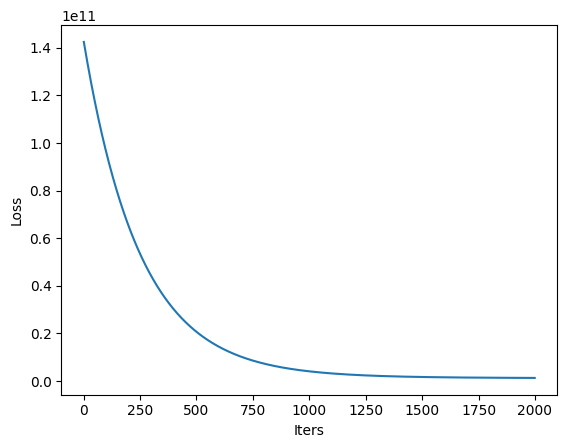

In [7]:
# w,b=gradient(X,y)
w,b=gradient(X,y)


In [8]:
def predict(input):
    y_lst=[]
    for i in range(len(input)):
        y_lst.append(w@input[i]+b)
    return np.array(y_lst)
    
    
# Crating dataframe with predicted and actual values   
yhat=predict(X)

df=pd.DataFrame()
df['y_actual']=y
df['ypredict']=np.round(yhat,1)
df


,y_actual,ypredict
0,399900,359540.6
1,329900,282886.0
2,369000,404560.0
3,232000,249728.4
4,539900,500988.1
5,328800,361672.7


In [10]:
from sklearn.metrics import r2_score
r2_score(y,yhat)

0.8460281650006027